# CIDDS Client Logs
###### Importing the required modules for the preprocessing and ignoring all warnings.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings


warnings.filterwarnings('ignore')

###### Reading the first dataframe (Week 1) and understanding the structure

In [2]:
df1 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS-001\\traffic\\OpenStack\\CIDDS-001-internal-week4.csv")
pd.set_option('display.max_columns', None)

print(df1.head(20))
print(df1.describe())
print(df1[df1["class"].isin(["attacker"])])

            Date first seen  Duration  Proto     Src IP Addr  Src Pt  \
0   2017-04-12 00:00:00.723     0.018  TCP     192.168.200.5   52746   
1   2017-04-12 00:00:00.742     0.000  TCP        EXT_SERVER    8082   
2   2017-04-12 00:00:01.315     0.018  TCP    192.168.220.16   32885   
3   2017-04-12 00:00:01.333     0.000  TCP        EXT_SERVER    8082   
4   2017-04-12 00:00:02.684     0.000  TCP     192.168.100.5     445   
5   2017-04-12 00:00:02.682     0.006  TCP     192.168.220.8   39354   
6   2017-04-12 00:00:02.684     0.000  TCP     192.168.100.5     445   
7   2017-04-12 00:00:02.682     0.006  TCP     192.168.220.8   39354   
8   2017-04-12 00:00:03.326     0.000  TCP        EXT_SERVER    8082   
9   2017-04-12 00:00:03.309     0.019  TCP    192.168.220.13   43904   
10  2017-04-12 00:00:04.152     0.000  UDP     192.168.220.4     137   
11  2017-04-12 00:00:12.765     0.000  TCP     192.168.100.5     445   
12  2017-04-12 00:00:12.766     0.000  TCP     192.168.220.5   5

###### Converting Date first seen into a recognisable datetime format and seeing change of flow rate

          Date first seen  Duration  Proto     Src IP Addr  Src Pt  \
0 2017-04-12 00:00:00.723     0.018  TCP     192.168.200.5   52746   
1 2017-04-12 00:00:00.742     0.000  TCP        EXT_SERVER    8082   
2 2017-04-12 00:00:01.315     0.018  TCP    192.168.220.16   32885   
3 2017-04-12 00:00:01.333     0.000  TCP        EXT_SERVER    8082   
4 2017-04-12 00:00:02.684     0.000  TCP     192.168.100.5     445   

      Dst IP Addr   Dst Pt  Packets     Bytes  Flows   Flags  Tos   class  \
0      EXT_SERVER   8082.0        2       338      1  .AP...    0  normal   
1   192.168.200.5  52746.0        1       212      1  .AP...   32  normal   
2      EXT_SERVER   8082.0        2       338      1  .AP...    0  normal   
3  192.168.220.16  32885.0        1       212      1  .AP...   32  normal   
4   192.168.220.8  39354.0        1       108      1  .AP...    0  normal   

  attackType attackID attackDescription  
0        ---      ---               ---  
1        ---      ---           

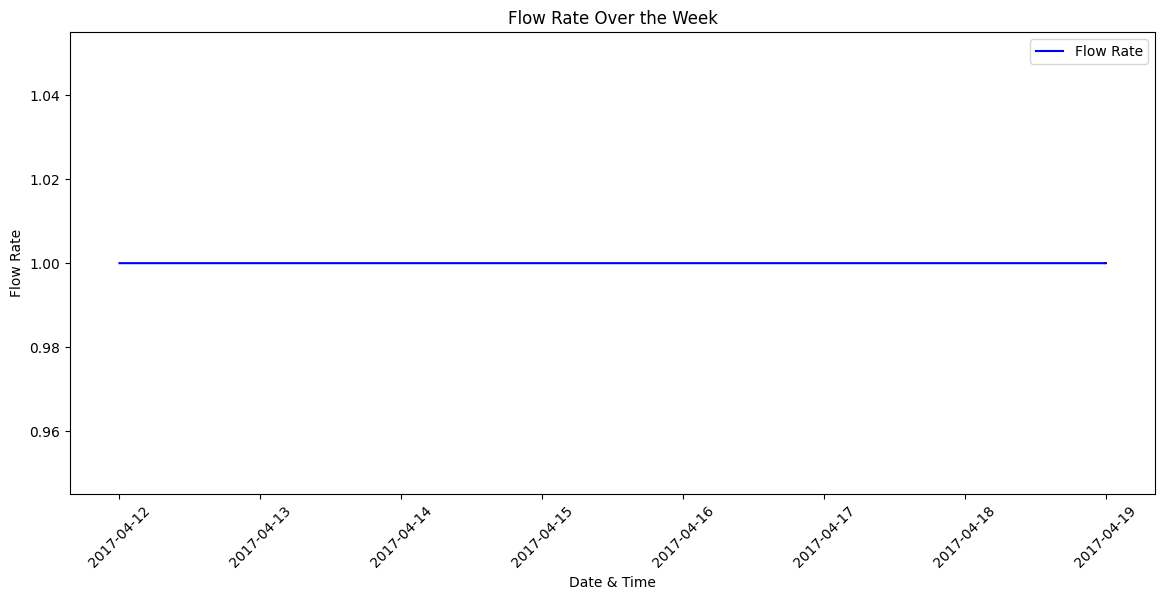

In [3]:
df1['Date first seen'] = pd.to_datetime(df1['Date first seen'])

plt.figure(figsize=(14, 6))
plt.plot(df1['Date first seen'], df1['Flows'], color='blue', label='Flow Rate')
print(df1.head())
plt.xlabel('Date & Time')
plt.ylabel('Flow Rate')
plt.title('Flow Rate Over the Week')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


###### Reading DataFrames Week 2,3,4

In [4]:
df2 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS-001\\traffic\\OpenStack\\CIDDS-001-internal-week3.csv")

In [5]:
df3 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS-001\\traffic\\OpenStack\\CIDDS-001-internal-week2.csv")

In [6]:
df4 = pd.read_csv("C:\\Users\\Narayanakshay\\Downloads\\CIDDS-001\\traffic\\OpenStack\\CIDDS-001-internal-week1.csv")

In [7]:
df = pd.concat([df1, df2, df3, df4], axis=0, ignore_index=True)

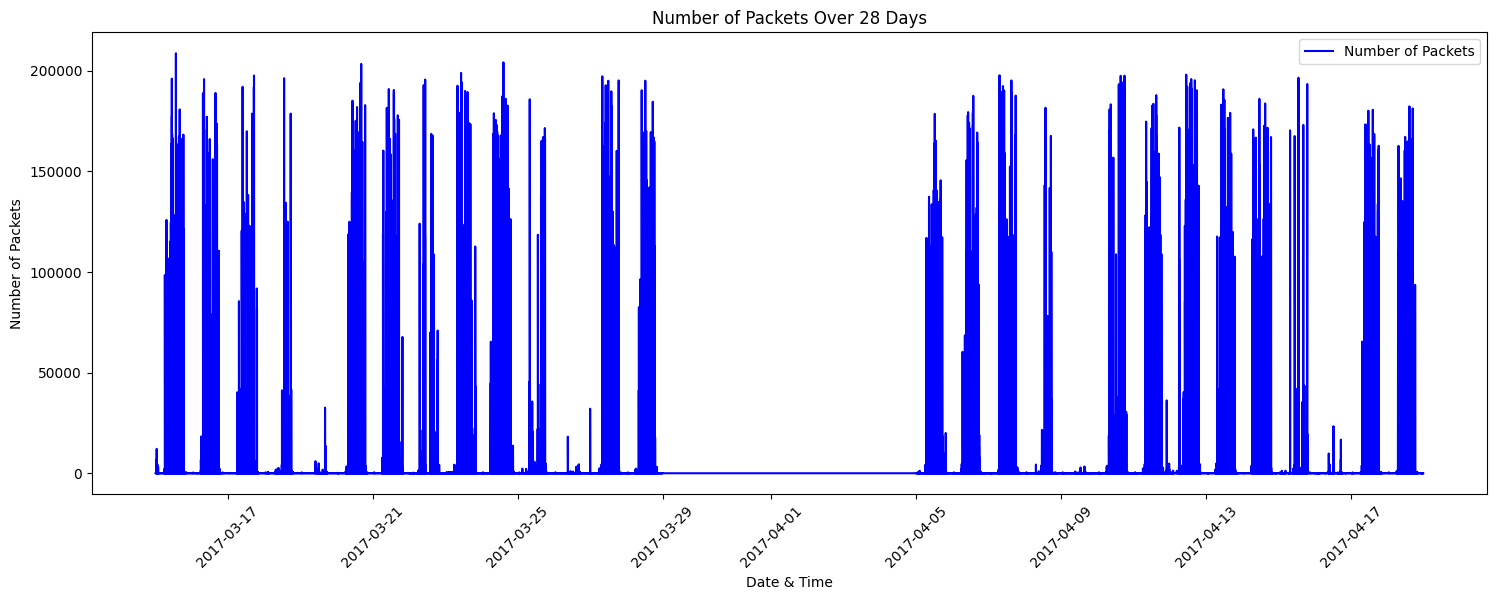

In [8]:
pd.set_option('display.max_columns', None)

df['Date first seen'] = pd.to_datetime(df['Date first seen'])

plt.figure(figsize=(18, 6))
plt.plot(df['Date first seen'], df['Packets'], color='blue', label='Number of Packets')

plt.xlabel('Date & Time')
plt.ylabel('Number of Packets')
plt.title('Number of Packets Over 28 Days')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [9]:
print(df.describe())

                     Date first seen      Duration        Src Pt  \
count                       31287933  3.128793e+07  3.128793e+07   
mean   2017-03-30 07:56:32.162331904  1.232569e-01  2.463138e+04   
min       2017-03-15 00:01:16.551000  0.000000e+00  0.000000e+00   
25%    2017-03-21 14:06:41.465999872  0.000000e+00  8.000000e+01   
50%    2017-03-25 18:16:49.377999872  0.000000e+00  8.082000e+03   
75%    2017-04-10 12:27:40.745999872  3.100000e-02  5.008000e+04   
max       2017-04-18 23:59:30.203000  2.380080e+02  6.553500e+04   
std                              NaN  8.024699e-01  2.509684e+04   

             Dst Pt       Packets       Flows           Tos  
count  3.128793e+07  3.128793e+07  31287933.0  3.128793e+07  
mean   2.441451e+04  1.535089e+01         1.0  9.817501e+00  
min    0.000000e+00  1.000000e+00         1.0  0.000000e+00  
25%    8.000000e+01  1.000000e+00         1.0  0.000000e+00  
50%    8.082000e+03  2.000000e+00         1.0  0.000000e+00  
75%    4.999600

In [10]:
df = pd.get_dummies(df, columns=['Proto'], prefix='Proto')

In [11]:
print(df.head())

          Date first seen  Duration     Src IP Addr  Src Pt     Dst IP Addr  \
0 2017-04-12 00:00:00.723     0.018   192.168.200.5   52746      EXT_SERVER   
1 2017-04-12 00:00:00.742     0.000      EXT_SERVER    8082   192.168.200.5   
2 2017-04-12 00:00:01.315     0.018  192.168.220.16   32885      EXT_SERVER   
3 2017-04-12 00:00:01.333     0.000      EXT_SERVER    8082  192.168.220.16   
4 2017-04-12 00:00:02.684     0.000   192.168.100.5     445   192.168.220.8   

    Dst Pt  Packets     Bytes  Flows   Flags  Tos   class attackType attackID  \
0   8082.0        2       338      1  .AP...    0  normal        ---      ---   
1  52746.0        1       212      1  .AP...   32  normal        ---      ---   
2   8082.0        2       338      1  .AP...    0  normal        ---      ---   
3  32885.0        1       212      1  .AP...   32  normal        ---      ---   
4  39354.0        1       108      1  .AP...    0  normal        ---      ---   

  attackDescription  Proto_ICMP   Prot

In [12]:
protocol_columns = [col for col in df.columns if 'Proto_' in col]
df[protocol_columns] = df[protocol_columns].astype(int)
print(df.head())

          Date first seen  Duration     Src IP Addr  Src Pt     Dst IP Addr  \
0 2017-04-12 00:00:00.723     0.018   192.168.200.5   52746      EXT_SERVER   
1 2017-04-12 00:00:00.742     0.000      EXT_SERVER    8082   192.168.200.5   
2 2017-04-12 00:00:01.315     0.018  192.168.220.16   32885      EXT_SERVER   
3 2017-04-12 00:00:01.333     0.000      EXT_SERVER    8082  192.168.220.16   
4 2017-04-12 00:00:02.684     0.000   192.168.100.5     445   192.168.220.8   

    Dst Pt  Packets     Bytes  Flows   Flags  Tos   class attackType attackID  \
0   8082.0        2       338      1  .AP...    0  normal        ---      ---   
1  52746.0        1       212      1  .AP...   32  normal        ---      ---   
2   8082.0        2       338      1  .AP...    0  normal        ---      ---   
3  32885.0        1       212      1  .AP...   32  normal        ---      ---   
4  39354.0        1       108      1  .AP...    0  normal        ---      ---   

  attackDescription  Proto_ICMP   Prot

In [13]:
df.columns.values.tolist()

['Date first seen',
 'Duration',
 'Src IP Addr',
 'Src Pt',
 'Dst IP Addr',
 'Dst Pt',
 'Packets',
 'Bytes',
 'Flows',
 'Flags',
 'Tos',
 'class',
 'attackType',
 'attackID',
 'attackDescription',
 'Proto_ICMP ',
 'Proto_IGMP ',
 'Proto_TCP  ',
 'Proto_UDP  ']

##### Checking no. of null values in the dataset [Null values already cleared]

In [14]:
print(df.isnull().sum())

Date first seen      0
Duration             0
Src IP Addr          0
Src Pt               0
Dst IP Addr          0
Dst Pt               0
Packets              0
Bytes                0
Flows                0
Flags                0
Tos                  0
class                0
attackType           0
attackID             0
attackDescription    0
Proto_ICMP           0
Proto_IGMP           0
Proto_TCP            0
Proto_UDP            0
dtype: int64


In [15]:
df.describe()

,Date first seen,Duration,Src Pt,Dst Pt,Packets,Flows,Tos,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP
count,31287933,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,31287933.0,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07,3.128793e+07
mean,2017-03-30 07:56:32.162331904,1.232569e-01,2.463138e+04,2.441451e+04,1.535089e+01,1.0,9.817501e+00,5.342315e-04,2.860528e-05,8.636796e-01,1.357576e-01
min,2017-03-15 00:01:16.551000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017-03-21 14:06:41.465999872,0.000000e+00,8.000000e+01,8.000000e+01,1.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2017-03-25 18:16:49.377999872,0.000000e+00,8.082000e+03,8.082000e+03,2.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2017-04-10 12:27:40.745999872,3.100000e-02,5.008000e+04,4.999600e+04,3.000000e+00,1.0,3.200000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
max,2017-04-18 23:59:30.203000,2.380080e+02,6.553500e+04,6.553500e+04,2.087680e+05,1.0,1.920000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
std,NaN,8.024699e-01,2.509684e+04,2.509105e+04,9.847063e+02,0.0,1.504512e+01,2.310727e-02,5.348314e-03,3.431285e-01,3.425310e-01


In [16]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP
0,2017-04-12 00:00:00.723,0.018,192.168.200.5,52746,EXT_SERVER,8082.0,2,338,1,.AP...,0,normal,---,---,---,0,0,1,0
1,2017-04-12 00:00:00.742,0.000,EXT_SERVER,8082,192.168.200.5,52746.0,1,212,1,.AP...,32,normal,---,---,---,0,0,1,0
2,2017-04-12 00:00:01.315,0.018,192.168.220.16,32885,EXT_SERVER,8082.0,2,338,1,.AP...,0,normal,---,---,---,0,0,1,0
3,2017-04-12 00:00:01.333,0.000,EXT_SERVER,8082,192.168.220.16,32885.0,1,212,1,.AP...,32,normal,---,---,---,0,0,1,0
4,2017-04-12 00:00:02.684,0.000,192.168.100.5,445,192.168.220.8,39354.0,1,108,1,.AP...,0,normal,---,---,---,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31287928,2017-03-21 23:59:56.083,0.248,192.168.200.8,62605,EXT_SERVER,8082.0,2,319,1,.AP...,0,normal,---,---,---,0,0,1,0
31287929,2017-03-21 23:59:57.037,0.000,10179_174,443,192.168.210.5,51433.0,1,54,1,.A....,32,normal,---,---,---,0,0,1,0
31287930,2017-03-21 23:59:56.920,0.000,192.168.210.5,51433,10179_174,443.0,1,55,1,.A....,0,normal,---,---,---,0,0,1,0
31287931,2017-03-21 23:59:58.299,0.000,192.168.100.5,445,192.168.220.6,56281.0,1,108,1,.AP...,0,normal,---,---,---,0,0,1,0


In [17]:
df['Day of Week'] = df['Date first seen'].dt.day_name()
df['Hour of Day'] = df['Date first seen'].dt.hour
df['minute'] = df['Date first seen'].dt.minute

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
def convert_to_numeric(value):
    multipliers = {'K': 1e3, 'M': 1e6, 'G': 1e9}
    if isinstance(value, str):
        suffix = value[-1]
        if suffix in multipliers:
            return float(value[:-1]) * multipliers[suffix]
    return float(value)

df['Bytes'] = df['Bytes'].apply(convert_to_numeric)
scaler = StandardScaler()
df['Bytes_Transf'] = scaler.fit_transform(df[['Bytes']])

In [20]:
df['Avg Packet Size'] = df['Bytes'] / df['Packets']

In [21]:
scaler = StandardScaler()
columns_to_normalize = ['Duration', 'Packets']
df['Duration_Tranf'] = scaler.fit_transform(df[['Duration']])
df['Packets_Transf'] = scaler.fit_transform(df[['Packets']])

In [23]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,attackID,attackDescription,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Day of Week,Hour of Day,minute,Bytes_Transf,Avg Packet Size,Duration_Tranf,Packets_Transf
0,2017-04-12 00:00:00.723,0.018,192.168.200.5,52746,EXT_SERVER,8082.0,2,338.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,0,-0.009204,169.0,-0.131166,-0.013558
1,2017-04-12 00:00:00.742,0.000,EXT_SERVER,8082,192.168.200.5,52746.0,1,212.0,1,.AP...,32,normal,---,---,---,0,0,1,0,Wednesday,0,0,-0.009266,212.0,-0.153597,-0.014574
2,2017-04-12 00:00:01.315,0.018,192.168.220.16,32885,EXT_SERVER,8082.0,2,338.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,0,-0.009204,169.0,-0.131166,-0.013558
3,2017-04-12 00:00:01.333,0.000,EXT_SERVER,8082,192.168.220.16,32885.0,1,212.0,1,.AP...,32,normal,---,---,---,0,0,1,0,Wednesday,0,0,-0.009266,212.0,-0.153597,-0.014574
4,2017-04-12 00:00:02.684,0.000,192.168.100.5,445,192.168.220.8,39354.0,1,108.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Wednesday,0,0,-0.009317,108.0,-0.153597,-0.014574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31287928,2017-03-21 23:59:56.083,0.248,192.168.200.8,62605,EXT_SERVER,8082.0,2,319.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Tuesday,23,59,-0.009214,159.5,0.155449,-0.013558
31287929,2017-03-21 23:59:57.037,0.000,10179_174,443,192.168.210.5,51433.0,1,54.0,1,.A....,32,normal,---,---,---,0,0,1,0,Tuesday,23,59,-0.009344,54.0,-0.153597,-0.014574
31287930,2017-03-21 23:59:56.920,0.000,192.168.210.5,51433,10179_174,443.0,1,55.0,1,.A....,0,normal,---,---,---,0,0,1,0,Tuesday,23,59,-0.009343,55.0,-0.153597,-0.014574
31287931,2017-03-21 23:59:58.299,0.000,192.168.100.5,445,192.168.220.6,56281.0,1,108.0,1,.AP...,0,normal,---,---,---,0,0,1,0,Tuesday,23,59,-0.009317,108.0,-0.153597,-0.014574


In [24]:
df["class"].value_counts()

class
normal      28051906
attacker     1656605
victim       1579422
Name: count, dtype: int64

In [25]:
df = df.drop('attackID', axis=1)
df = df.drop('attackDescription', axis=1)

In [26]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Day of Week,Hour of Day,minute,Bytes_Transf,Avg Packet Size,Duration_Tranf,Packets_Transf
0,2017-04-12 00:00:00.723,0.018,192.168.200.5,52746,EXT_SERVER,8082.0,2,338.0,1,.AP...,0,normal,---,0,0,1,0,Wednesday,0,0,-0.009204,169.0,-0.131166,-0.013558
1,2017-04-12 00:00:00.742,0.000,EXT_SERVER,8082,192.168.200.5,52746.0,1,212.0,1,.AP...,32,normal,---,0,0,1,0,Wednesday,0,0,-0.009266,212.0,-0.153597,-0.014574
2,2017-04-12 00:00:01.315,0.018,192.168.220.16,32885,EXT_SERVER,8082.0,2,338.0,1,.AP...,0,normal,---,0,0,1,0,Wednesday,0,0,-0.009204,169.0,-0.131166,-0.013558
3,2017-04-12 00:00:01.333,0.000,EXT_SERVER,8082,192.168.220.16,32885.0,1,212.0,1,.AP...,32,normal,---,0,0,1,0,Wednesday,0,0,-0.009266,212.0,-0.153597,-0.014574
4,2017-04-12 00:00:02.684,0.000,192.168.100.5,445,192.168.220.8,39354.0,1,108.0,1,.AP...,0,normal,---,0,0,1,0,Wednesday,0,0,-0.009317,108.0,-0.153597,-0.014574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31287928,2017-03-21 23:59:56.083,0.248,192.168.200.8,62605,EXT_SERVER,8082.0,2,319.0,1,.AP...,0,normal,---,0,0,1,0,Tuesday,23,59,-0.009214,159.5,0.155449,-0.013558
31287929,2017-03-21 23:59:57.037,0.000,10179_174,443,192.168.210.5,51433.0,1,54.0,1,.A....,32,normal,---,0,0,1,0,Tuesday,23,59,-0.009344,54.0,-0.153597,-0.014574
31287930,2017-03-21 23:59:56.920,0.000,192.168.210.5,51433,10179_174,443.0,1,55.0,1,.A....,0,normal,---,0,0,1,0,Tuesday,23,59,-0.009343,55.0,-0.153597,-0.014574
31287931,2017-03-21 23:59:58.299,0.000,192.168.100.5,445,192.168.220.6,56281.0,1,108.0,1,.AP...,0,normal,---,0,0,1,0,Tuesday,23,59,-0.009317,108.0,-0.153597,-0.014574


In [27]:
df['Flags']

0           .AP...
1           .AP...
2           .AP...
3           .AP...
4           .AP...
             ...  
31287928    .AP...
31287929    .A....
31287930    .A....
31287931    .AP...
31287932    .AP...
Name: Flags, Length: 31287933, dtype: object

In [63]:
target_flags = ['A', 'P', 'S', 'R', 'F','U']
for i in target_flags:
    df[i] = df['Flags'].str.contains(i).astype(int)

In [64]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flows,Flags,Tos,class,attackType,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Day of Week,Hour of Day,minute,Bytes_Transf,Avg Packet Size,Duration_Tranf,Packets_Transf,Flag_A,A,P,S,R,F,U
0,2017-04-12 00:00:00.723,0.018,192.168.200.5,52746,EXT_SERVER,8082.0,2,338.0,1,.AP...,0,normal,---,0,0,1,0,Wednesday,0,0,-0.009204,169.0,-0.131166,-0.013558,False,1,1,0,0,0,0
1,2017-04-12 00:00:00.742,0.000,EXT_SERVER,8082,192.168.200.5,52746.0,1,212.0,1,.AP...,32,normal,---,0,0,1,0,Wednesday,0,0,-0.009266,212.0,-0.153597,-0.014574,False,1,1,0,0,0,0
2,2017-04-12 00:00:01.315,0.018,192.168.220.16,32885,EXT_SERVER,8082.0,2,338.0,1,.AP...,0,normal,---,0,0,1,0,Wednesday,0,0,-0.009204,169.0,-0.131166,-0.013558,False,1,1,0,0,0,0
3,2017-04-12 00:00:01.333,0.000,EXT_SERVER,8082,192.168.220.16,32885.0,1,212.0,1,.AP...,32,normal,---,0,0,1,0,Wednesday,0,0,-0.009266,212.0,-0.153597,-0.014574,False,1,1,0,0,0,0
4,2017-04-12 00:00:02.684,0.000,192.168.100.5,445,192.168.220.8,39354.0,1,108.0,1,.AP...,0,normal,---,0,0,1,0,Wednesday,0,0,-0.009317,108.0,-0.153597,-0.014574,False,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31287928,2017-03-21 23:59:56.083,0.248,192.168.200.8,62605,EXT_SERVER,8082.0,2,319.0,1,.AP...,0,normal,---,0,0,1,0,Tuesday,23,59,-0.009214,159.5,0.155449,-0.013558,False,1,1,0,0,0,0
31287929,2017-03-21 23:59:57.037,0.000,10179_174,443,192.168.210.5,51433.0,1,54.0,1,.A....,32,normal,---,0,0,1,0,Tuesday,23,59,-0.009344,54.0,-0.153597,-0.014574,False,1,0,0,0,0,0
31287930,2017-03-21 23:59:56.920,0.000,192.168.210.5,51433,10179_174,443.0,1,55.0,1,.A....,0,normal,---,0,0,1,0,Tuesday,23,59,-0.009343,55.0,-0.153597,-0.014574,False,1,0,0,0,0,0
31287931,2017-03-21 23:59:58.299,0.000,192.168.100.5,445,192.168.220.6,56281.0,1,108.0,1,.AP...,0,normal,---,0,0,1,0,Tuesday,23,59,-0.009317,108.0,-0.153597,-0.014574,False,1,1,0,0,0,0


In [66]:
df = df.drop('Flag_A',axis = 1)

In [67]:
df = df.drop('Flows', axis=1)

In [68]:
df

,Date first seen,Duration,Src IP Addr,Src Pt,Dst IP Addr,Dst Pt,Packets,Bytes,Flags,Tos,class,attackType,Proto_ICMP,Proto_IGMP,Proto_TCP,Proto_UDP,Day of Week,Hour of Day,minute,Bytes_Transf,Avg Packet Size,Duration_Tranf,Packets_Transf,A,P,S,R,F,U
0,2017-04-12 00:00:00.723,0.018,192.168.200.5,52746,EXT_SERVER,8082.0,2,338.0,.AP...,0,normal,---,0,0,1,0,Wednesday,0,0,-0.009204,169.0,-0.131166,-0.013558,1,1,0,0,0,0
1,2017-04-12 00:00:00.742,0.000,EXT_SERVER,8082,192.168.200.5,52746.0,1,212.0,.AP...,32,normal,---,0,0,1,0,Wednesday,0,0,-0.009266,212.0,-0.153597,-0.014574,1,1,0,0,0,0
2,2017-04-12 00:00:01.315,0.018,192.168.220.16,32885,EXT_SERVER,8082.0,2,338.0,.AP...,0,normal,---,0,0,1,0,Wednesday,0,0,-0.009204,169.0,-0.131166,-0.013558,1,1,0,0,0,0
3,2017-04-12 00:00:01.333,0.000,EXT_SERVER,8082,192.168.220.16,32885.0,1,212.0,.AP...,32,normal,---,0,0,1,0,Wednesday,0,0,-0.009266,212.0,-0.153597,-0.014574,1,1,0,0,0,0
4,2017-04-12 00:00:02.684,0.000,192.168.100.5,445,192.168.220.8,39354.0,1,108.0,.AP...,0,normal,---,0,0,1,0,Wednesday,0,0,-0.009317,108.0,-0.153597,-0.014574,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31287928,2017-03-21 23:59:56.083,0.248,192.168.200.8,62605,EXT_SERVER,8082.0,2,319.0,.AP...,0,normal,---,0,0,1,0,Tuesday,23,59,-0.009214,159.5,0.155449,-0.013558,1,1,0,0,0,0
31287929,2017-03-21 23:59:57.037,0.000,10179_174,443,192.168.210.5,51433.0,1,54.0,.A....,32,normal,---,0,0,1,0,Tuesday,23,59,-0.009344,54.0,-0.153597,-0.014574,1,0,0,0,0,0
31287930,2017-03-21 23:59:56.920,0.000,192.168.210.5,51433,10179_174,443.0,1,55.0,.A....,0,normal,---,0,0,1,0,Tuesday,23,59,-0.009343,55.0,-0.153597,-0.014574,1,0,0,0,0,0
31287931,2017-03-21 23:59:58.299,0.000,192.168.100.5,445,192.168.220.6,56281.0,1,108.0,.AP...,0,normal,---,0,0,1,0,Tuesday,23,59,-0.009317,108.0,-0.153597,-0.014574,1,1,0,0,0,0


In [ ]:
df.to_csv("C:\\Users\\Narayanakshay\\OneDrive\\Desktop\\NIDS\\CIDDS_Client_Final.csv", index=False)